In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
pwd

'/Users/amnon/dropbox2/Dropbox/dbbact/figures-new/fig3-stats'

In [3]:
ca.set_log_level(11)

In [4]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


In [7]:
res=db.db._get('ontology/get_annotations',{'term':'entity','get_children':'true'},param_json=False)

In [8]:
res=res.json()['annotations']

In [9]:
len(res)

6021

In [10]:
def get_term_stats(terms):
    allres=[]
    for cterm in terms:
        res=db.db._get('ontology/get_annotations',{'term':cterm, 'get_children': 'true'},param_json=False)
        res=res.json()['annotations']
        allres.extend(res)
    allanno=set([x['annotationid'] for x in allres])
#     print('total annotations: %d' % len(allres))
    allexp=set([x['expid'] for x in allres])
#     print('total experiments: %d' % len(allexp))
    return len(allres), len(allexp)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def plot_term_coverage(terms):
    nanno=[]
    nexp=[]
    tlist=[]
    for cterms in terms:
        tterms = []
        for ccterm in cterms:
            ccterm=ccterm.split('*')[-1]
            tterms.append(ccterm)
        cnanno, cnexp = get_term_stats(tterms)
        nanno.append(cnanno)
        nexp.append(cnexp)
        aterm = cterms[0]
        nstars = aterm.count('*')
        aterm = aterm.split('*')[-1]
        aterm = aterm + '---' * nstars
        tlist.append(aterm)
    plt.figure()
    plt.barh(np.arange(len(tlist)),nexp,tick_label=tlist)
    plt.xscale('log')
    plt.title('nexp')
    plt.figure()
    plt.barh(np.arange(len(tlist)),nanno,tick_label=tlist)
    plt.xscale('log')
    plt.title('nanno')

In [12]:
get_term_stats(['plant'])

(69, 7)

In [13]:
get_term_stats(['soil','rhyzosphere'])

(588, 80)

In [14]:
get_term_stats('feces')

(0, 0)

In [15]:
get_term_stats('immaterial entity')

(12, 1)

In [16]:
get_term_stats(['sediemnt', 'marine sediment'])

(109, 16)

In [17]:
get_term_stats(['water','salt water'])

(539, 72)

In [18]:
get_term_stats(['fresh water','river','lake'])

(367, 35)

In [19]:
get_term_stats(['material entity'])

(6013, 756)

In [20]:
get_term_stats(['environmental system'])

(274, 36)

In [21]:
get_term_stats(['part of plant'])

(123, 19)

In [22]:
get_term_stats(['organism'])

(4721, 619)

In [23]:
get_term_stats(['chemical entity'])

(388, 76)

In [24]:
get_term_stats(['food product'])

(0, 0)

In [25]:
get_term_stats(['anatomical cluster'])

(4, 1)

In [26]:
get_term_stats(['environmental feature'])

(3, 1)

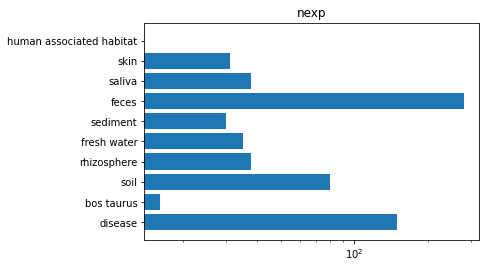

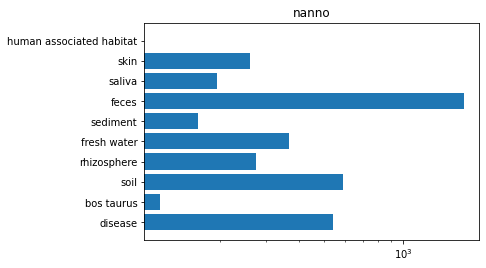

In [27]:
plot_term_coverage([['disease'],['bos taurus','cow'],['soil'],['rhizosphere'],['fresh water','river','lake'],['sediment'],['feces'],['saliva'],['skin'],['human associated habitat']])

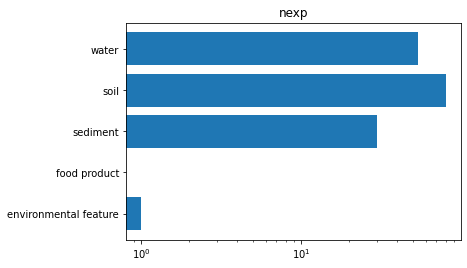

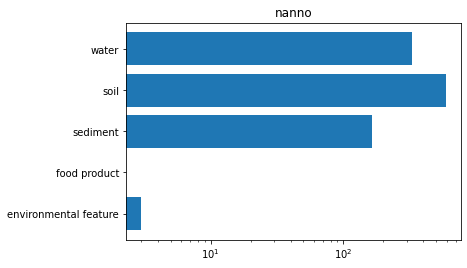

In [28]:
plot_term_coverage([['environmental feature'],['food product'],['sediment'],['soil'],['water']])

# ENVO

In [29]:
get_term_stats(['anatomical entity'])

(3527, 514)

In [30]:
get_term_stats(['immaterial entity'])

(664, 107)

In [31]:
get_term_stats(['disease by infectious agent'])

(30, 9)

In [32]:
get_term_stats(['disease of anatomical entity'])

(299, 86)

In [33]:
res=db.db._get('ontology/get_parents',{'term':'rhizosphere'},param_json=False)

In [34]:
res.content

b'{"parents": ["continuant", "rhizosphere", "site", "independent continuant", "entity", "immaterial entity", "na", "environmental zone"]}'

In [35]:
res=db.db._get('ontology/get_term_children',{'term':'immaterial entity'},param_json=True)

In [36]:
res.content

b'{"terms": {"134147": "carr", "134152": "saline wetland", "135177": "area of rocky shore", "135693": "planetary subsurface zone", "135694": "continental subsurface zone", "135187": "disturbed area", "135189": "roadside", "135702": "lichen woodland", "134170": "prairie", "136231": "area of pack ice", "136232": "area of sea ice", "136233": "area of drift ice", "136256": "two-dimensional fiat ice surface", "136257": "two-dimensional fiat water ice surface", "1089": "rhizosphere", "134211": "sea coast", "134208": "scrubland area", "134209": "chaparral area", "75": "peatland", "136268": "area of seasonal sea ice", "134223": "intertidal zone", "134224": "terrestrial environmental zone", "136277": "terrestrial ecoregion", "602": "city", "134235": "vadose zone", "134236": "phreatic zone", "96": "populated place", "108": "farm", "135791": "oceanic subsurface zone", "134267": "area of protected biodiversity", "134268": "protected area", "134271": "area of national forest", "134272": "site of sp

# DOID

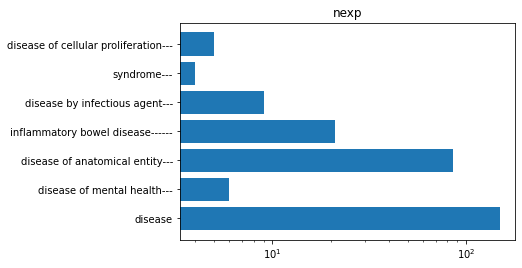

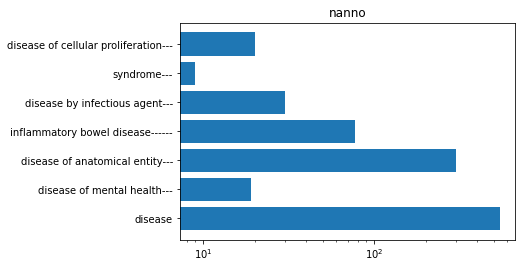

In [37]:
plot_term_coverage([['disease'],['*disease of mental health'],['*disease of anatomical entity'],['**inflammatory bowel disease'],['*disease by infectious agent'],['*syndrome'],['*disease of cellular proliferation']])

# GAZ

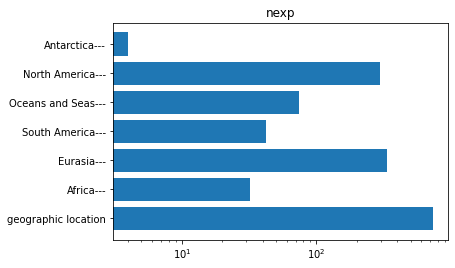

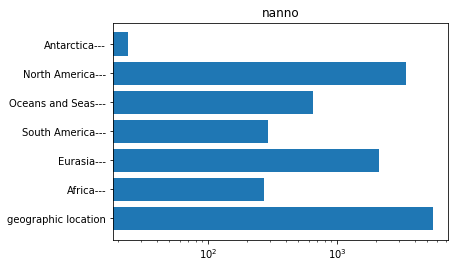

In [38]:
plot_term_coverage([['geographic location'],['*Africa'],['*Eurasia'],['*South America'],['*Oceans and Seas'],['*North America','*United states of america'],['*Antarctica']])

# Uberon

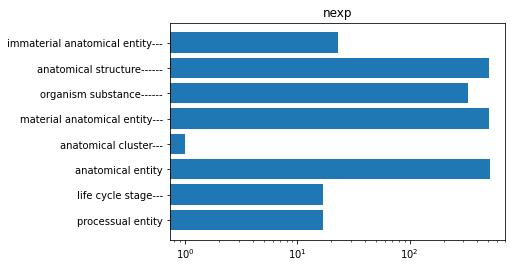

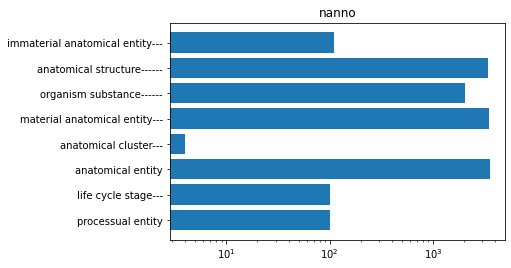

In [39]:
plot_term_coverage([['processual entity'],['*life cycle stage'],['anatomical entity'],['*anatomical cluster'],['*material anatomical entity'],['**organism substance'],['**anatomical structure'],['*immaterial anatomical entity']])

# EFO

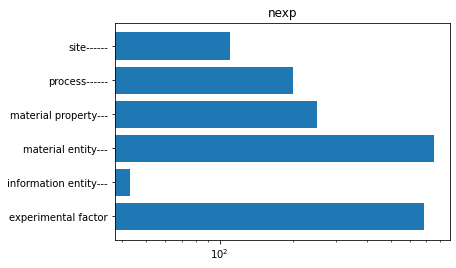

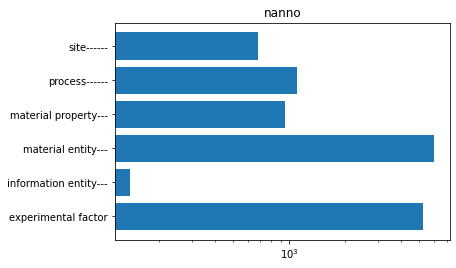

In [40]:
plot_term_coverage([['experimental factor'],['*information entity'],['*material entity'],['*material property'],['**process'],['**site']])

NOTE: material entity includes sex, disease

# ALL

In [41]:
terms=[]
# efo
terms.extend([['experimental factor'],['*information entity'],['*material entity'],['*material property'],['**process'],['**site']])
# uberon
terms.extend([['processual entity'],['*life cycle stage'],['anatomical entity'],['*anatomical cluster'],['*material anatomical entity'],['**organism substance'],['**anatomical structure'],['*immaterial anatomical entity']])
# doid
terms.extend([['disease'],['*disease of mental health'],['*disease of anatomical entity'],['**inflammatory bowel disease'],['*disease by infectious agent'],['*syndrome'],['*disease of cellular proliferation']])
# gaz
terms.extend([['geographic location'],['*Africa'],['*Eurasia'],['*South America'],['*Oceans and Seas'],['*North America','*United states of america'],['*Antarctica']])

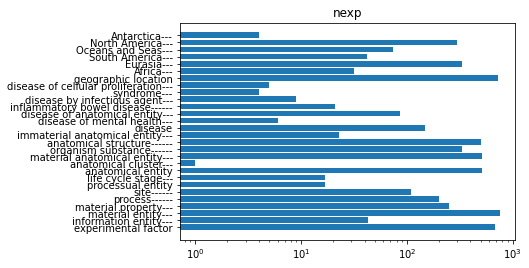

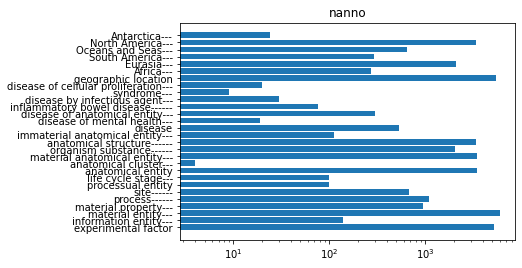

In [42]:
plot_term_coverage(terms)

In [43]:
terms=[]
# efo
terms.extend([['experimental factor'],['*information entity'],['*material entity'],['*material property']])
# uberon
terms.extend([['anatomical entity'],['*anatomical cluster'],['*material anatomical entity'],['**organism substance'],['**anatomical structure'],['*immaterial anatomical entity']])
# doid
terms.extend([['disease'],['*disease of mental health'],['*disease of anatomical entity'],['*disease by infectious agent'],['*disease of cellular proliferation']])
# gaz
terms.extend([['geographic location'],['*Africa'],['*Eurasia'],['*North America','*United states of america']])

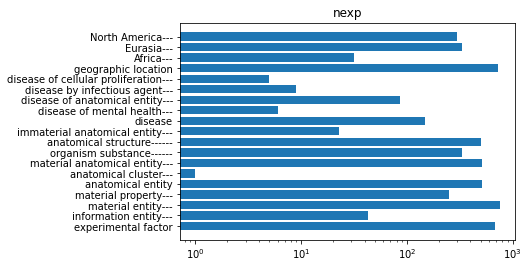

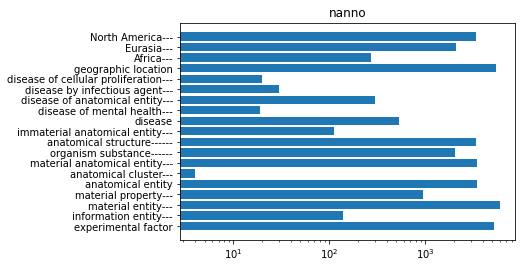

In [44]:
plot_term_coverage(terms)

In [45]:
def print_term_info(term):
    res=db.db._get('ontology/get_annotations',{'term':term,'get_children':'true'},param_json=False)
    anno=res.json()['annotations']
    print('%s: %d annotations' % (term, len(anno)))
    exp=set()
    for canno in anno:
        exp.add(canno['expid'])
    print('%s: %d experiments' % (term, len(exp)))


In [46]:
print_term_info('continuant')

continuant: 6021 annotations
continuant: 756 experiments


In [47]:
print_term_info('occurrent')

occurrent: 42 annotations
occurrent: 13 experiments


In [48]:
def generate_terms_map(terms, filename, ontologyname='ENVO'):
    flnodes = open(filename+'.nodes.csv','w')
    flnodes.write('term,num_anno,num_exp,ontology,label\n')
    fledges = open(filename+'.edges.csv','w')
    fledges.write('childterm,parentterm,type\n')
    for cterm in terms:
        print(cterm)
        res=db.db._get('ontology/get_annotations',{'term':cterm,'get_children':'true'},param_json=False)
        anno=res.json()['annotations']
        exp=set()
        for canno in anno:
            exp.add(canno['expid'])
        print('%d annotations %d exps' % (len(anno), len(exp)))
        label = '%s (%d)' % (cterm, len(exp))
        flnodes.write('%s,%d,%d,%s,%s\n' % (cterm, len(anno), len(exp), ontologyname, label))
        # find the closest parent
        res=db.db._get('ontology/get_parents',{'term':cterm},param_json=False)
        if res.reason != 'OK':
            print('error for parents for %s' % cterm)
            continue
        parents=set(res.json()['parents'])
        parent_term=None
        for ct in terms:
            if ct != cterm:
                if ct in parents:
                    parent_term=ct
        if parent_term is not None:
            fledges.write('%s,%s,PAR\n' % (cterm, parent_term))
            print('parent of %s is %s' % (cterm, parent_term))

    flnodes.close()
    fledges.close()

In [49]:
generate_terms_map(['entity','continuant','independent continuant','material entity','immaterial entity','organism','anatomical entity','homo sapiens','bos taurus','sus scrofa','environmental zone','food product type','environmental material','soil','sediment','body of liquid','ocean','river','lake'],'cytoscape_envo')

entity
6021 annotations 756 exps
continuant
6021 annotations 756 exps
parent of continuant is entity
independent continuant
6017 annotations 756 exps
parent of independent continuant is continuant
material entity
6013 annotations 756 exps
parent of material entity is independent continuant
immaterial entity
664 annotations 107 exps
parent of immaterial entity is independent continuant
organism
4721 annotations 619 exps
parent of organism is material entity
anatomical entity
3527 annotations 514 exps
parent of anatomical entity is independent continuant
homo sapiens
1398 annotations 241 exps
parent of homo sapiens is organism
bos taurus
75 annotations 16 exps
parent of bos taurus is organism
sus scrofa
85 annotations 13 exps
parent of sus scrofa is organism
environmental zone
664 annotations 107 exps
parent of environmental zone is immaterial entity
food product type
159 annotations 25 exps
parent of food product type is material entity
environmental material
1220 annotations 185 exps
p

In [50]:
print_term_info('immaterial entity')

immaterial entity: 664 annotations
immaterial entity: 107 experiments


In [51]:
generate_terms_map(['disease','disease by infectious agent','disease of mental health','genetic disease','disease of metabolism','disease of anatomical entity','syndrome',"crohn's disease",'ulcerative colitis','diarrhea','periodontitis','anorexia nervosa','obesity','hiv infection'],'cytoscape_doid')

disease
540 annotations 149 exps
disease by infectious agent
30 annotations 9 exps
parent of disease by infectious agent is disease
disease of mental health
19 annotations 6 exps
parent of disease of mental health is disease
genetic disease
11 annotations 3 exps
parent of genetic disease is disease
disease of metabolism
59 annotations 13 exps
parent of disease of metabolism is disease
disease of anatomical entity
299 annotations 86 exps
parent of disease of anatomical entity is disease
syndrome
9 annotations 4 exps
parent of syndrome is disease
crohn's disease
38 annotations 11 exps
parent of crohn's disease is disease of anatomical entity
ulcerative colitis
31 annotations 8 exps
parent of ulcerative colitis is disease of anatomical entity
diarrhea
23 annotations 7 exps
parent of diarrhea is disease of anatomical entity
periodontitis
41 annotations 10 exps
parent of periodontitis is disease of anatomical entity
anorexia nervosa
2 annotations 1 exps
parent of anorexia nervosa is disease

In [52]:
generate_terms_map(['anatomical entity','immaterial anatomical entity','material anatomical entity','anatomical collection','anatomical structure','organism substance','feces','saliva','urine','skin','nasopharynx','cecum','duodenum','stomach','rumen','pair of nares','mouth','dentition'],'cytoscape_uberon')

anatomical entity
3527 annotations 514 exps
immaterial anatomical entity
111 annotations 23 exps
parent of immaterial anatomical entity is anatomical entity
material anatomical entity
3519 annotations 513 exps
parent of material anatomical entity is anatomical entity
anatomical collection
185 annotations 33 exps
parent of anatomical collection is material anatomical entity
anatomical structure
3445 annotations 506 exps
parent of anatomical structure is material anatomical entity
organism substance
2063 annotations 330 exps
parent of organism substance is material anatomical entity
feces
1700 annotations 281 exps
parent of feces is organism substance
saliva
195 annotations 38 exps
parent of saliva is organism substance
urine
8 annotations 4 exps
parent of urine is organism substance
skin
261 annotations 31 exps
nasopharynx
50 annotations 9 exps
parent of nasopharynx is anatomical structure
cecum
2 annotations 1 exps
duodenum
43 annotations 10 exps
parent of duodenum is anatomical struct

In [53]:
generate_terms_map(['eukaryota','streptophyta','metazoa','chordata','mammalia','primates','hominidae','gorilla','pan','sus scrofa','homo sapiens','bos taurus','canis','equus','triticum aestivum','zea mays','zostera','insecta','actinopterygii','danio rerio','oreochromis niloticus','cyprinus carpio'],'cytoscape_tax')

eukaryota
4713 annotations 617 exps
streptophyta
672 annotations 82 exps
parent of streptophyta is eukaryota
metazoa
4051 annotations 540 exps
parent of metazoa is eukaryota
chordata
3234 annotations 484 exps
parent of chordata is metazoa
mammalia
2738 annotations 416 exps
parent of mammalia is chordata
primates
1550 annotations 255 exps
parent of primates is mammalia
hominidae
1446 annotations 246 exps
parent of hominidae is primates
gorilla
22 annotations 5 exps
parent of gorilla is hominidae
pan
24 annotations 4 exps
parent of pan is hominidae
sus scrofa
85 annotations 13 exps
parent of sus scrofa is mammalia
homo sapiens
1398 annotations 241 exps
parent of homo sapiens is hominidae
bos taurus
75 annotations 16 exps
parent of bos taurus is mammalia
canis
115 annotations 24 exps
parent of canis is mammalia
equus
62 annotations 10 exps
parent of equus is mammalia
triticum aestivum
62 annotations 8 exps
parent of triticum aestivum is streptophyta
zea mays
29 annotations 6 exps
parent o

In [54]:
generate_terms_map(['geographic location','eurasia','south america','north america','australia','africa','oceans and seas','pacific ocean','atlantic ocean','china','israel','united states of america','italy','japan','brazil','germany','north africa','sub-saharan africa','namibia','tanzania','south africa'],'cytoscape_gaz')

geographic location
5506 annotations 730 exps
eurasia
2097 annotations 334 exps
parent of eurasia is geographic location
south america
290 annotations 42 exps
parent of south america is geographic location
north america
1651 annotations 193 exps
parent of north america is geographic location
australia
127 annotations 20 exps
parent of australia is geographic location
africa
273 annotations 32 exps
parent of africa is geographic location
oceans and seas
651 annotations 74 exps
parent of oceans and seas is geographic location
pacific ocean
325 annotations 26 exps
parent of pacific ocean is oceans and seas
atlantic ocean
111 annotations 23 exps
parent of atlantic ocean is oceans and seas
china
833 annotations 148 exps
parent of china is eurasia
israel
91 annotations 15 exps
parent of israel is eurasia
united states of america
1752 annotations 231 exps
parent of united states of america is geographic location
italy
120 annotations 15 exps
parent of italy is eurasia
japan
61 annotations 11 